In [1]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null
# 런타임 다시시작

In [1]:
!pip install pymysql > /dev/null #mysql 설치

# mysql.json 파일 업로드
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# json 파일 읽기, mysql 로그인 및 접속
import json, pymysql
with open(filename) as fp:
  config_str = fp.read()
config = json.loads(config_str)

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')
from datetime import datetime 

Saving mysql.json to mysql.json


In [2]:
import db_module as dm

## 1. 월별 매출/이익

In [3]:
results = dm.get_monthly(config)
df = pd.DataFrame(results, columns=['월', '매출', '이익'])
df.set_index('월', inplace=True)
df['매출'] = df.매출.astype(int)
df['이익'] = df.이익.astype(int)
df

,매출,이익
월,,
01,5359915,3928522
02,7290818,5397788
03,5035146,3837538
04,7529385,5306655
05,4504588,3437077
06,5079282,3839122
07,4454681,3034244
08,8153382,5708595
09,4679006,3229042


In [4]:
tdf = df.T
tdf['계'] = [df.매출.sum(), df.이익.sum()]

In [5]:
tdf

월,01,02,03,04,05,06,07,08,09,10,11,12,계
매출,5359915,7290818,5035146,7529385,4504588,5079282,4454681,8153382,4679006,5327517,5576008,4943715,67933443
이익,3928522,5397788,3837538,5306655,3437077,3839122,3034244,5708595,3229042,3591285,4091728,3599074,49000670


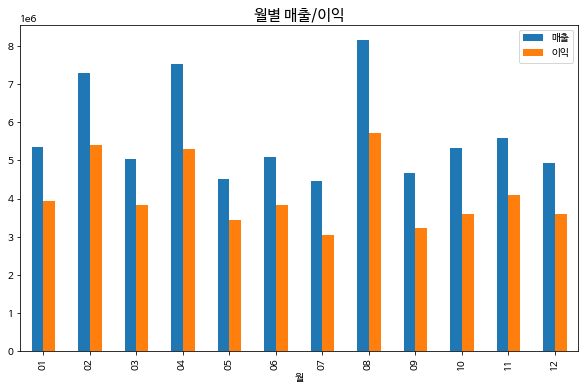

In [33]:

df.plot.bar(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.show()

## 거래처별 매출 및 이익

In [86]:
# 소수점 자리 제한을 위한 코드
pd.options.display.float_format = '{:.2f}'.format

In [87]:
results = dm.get_company_rp(config)
df2 = pd.DataFrame(results, columns=['거래처', '매출', '이익'])
df2.set_index('거래처', inplace=True)
df2['매출'] = df2.매출.astype(int)
df2['이익'] = df2.이익.astype(int)
df2['이익율'] = df2.이익 / df2.매출 * 100
df2

,매출,이익,이익율
거래처,,,
abc마트,14295632,10195959,71.32
롯데백화점,12741450,9428090,74.00
무신사,13530551,9950057,73.54
이마트,12902800,9166350,71.04
현대백화점,14463010,10260214,70.94


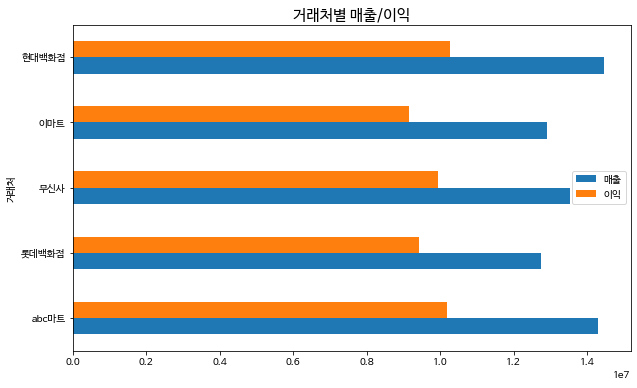

In [34]:
df2.plot.barh(figsize=(10,6))
plt.title('거래처별 매출/이익', size=15)
plt.show()

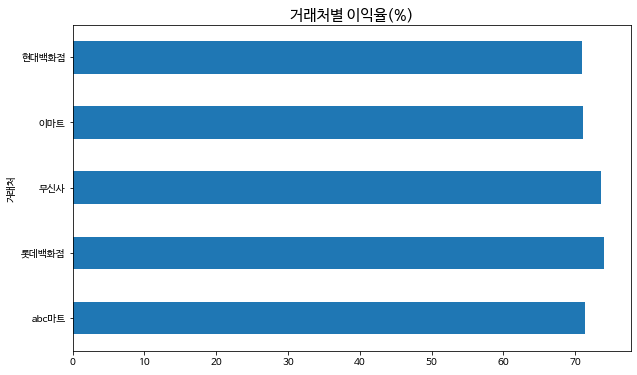

In [75]:
df2['이익율'].plot.barh(figsize=(10,6))
plt.title('거래처별 이익율(%)', size=15)
plt.show()

## 거래처별 판매제품 및 수량

In [49]:
results = dm.get_company_nu(config)
df3 = pd.DataFrame(results, columns=['거래처', '제품명', '수량'])
df3.set_index(['거래처', '제품명'], inplace=True)
df3['수량'] = df3.수량.astype(int)
df3

수량
거래처   제품명      
abc마트 구두1     9
      구두2     8
      긴팔티1    5
      러닝화1    7
      맨투맨1    9
...          ..
현대백화점 슬리퍼1   10
      중청바지1  26
      중청바지2  16
      청바지1    9
      청바지2    7

[90 rows x 1 columns]

In [51]:
df3.reset_index()['거래처'].unique()

array(['abc마트', '롯데백화점', '무신사', '이마트', '현대백화점'], dtype=object)

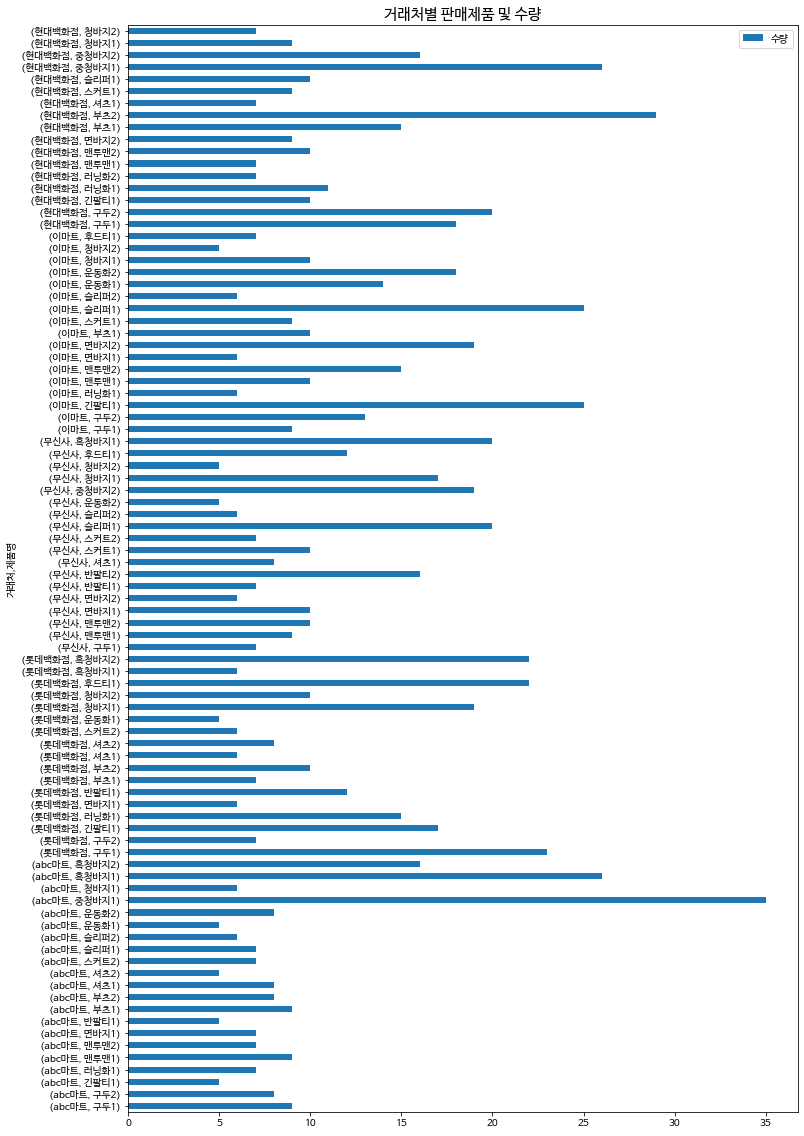

In [35]:
df3.plot.barh(figsize=(12,20))
plt.title('거래처별 판매제품 및 수량', size=15)
plt.show()

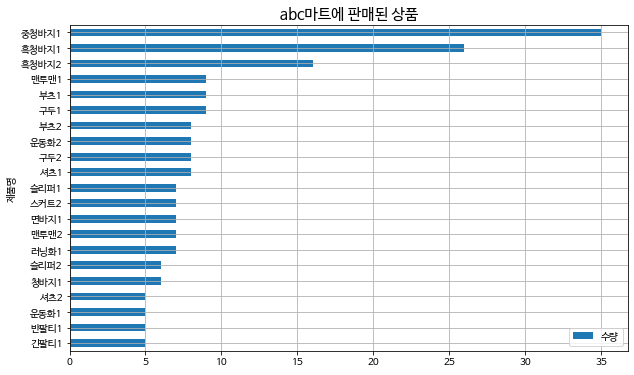

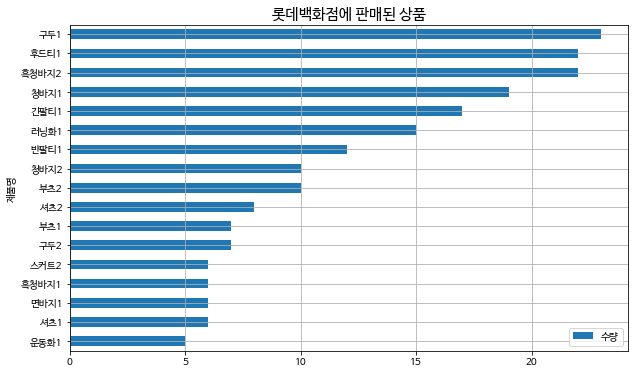

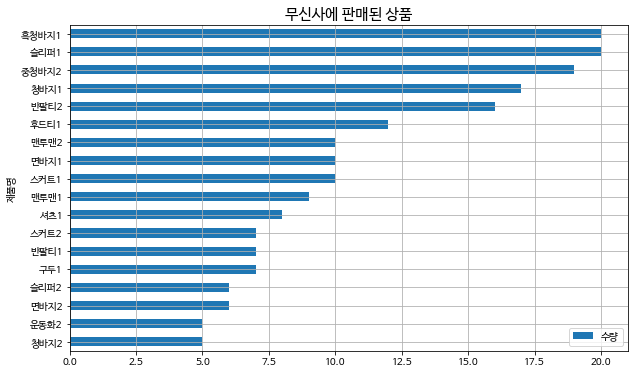

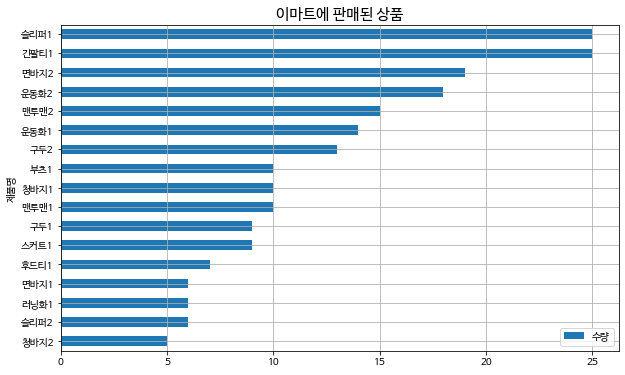

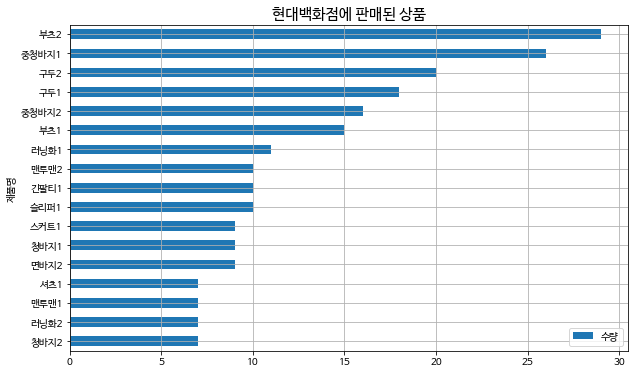

In [61]:
for company in df3.reset_index()['거래처'].unique():
    sdf=df3.loc[(company,)]
    sdf.sort_values(by='수량').plot.barh(figsize=(10,6))
    plt.title(f'{company}에 판매된 상품', size=15)
    plt.grid()
    plt.show()

## 제품별 판매수량/매출/이익

In [16]:
results = dm.get_pname_rp(config)
df4 = pd.DataFrame(results, columns=['제품명', '판매량', '매출', '이익'])
df4.set_index('제품명', inplace=True)
df4['판매량'] = df4.판매량.astype(int)
df4['매출'] = df4.매출.astype(int)
df4['이익'] = df4.이익.astype(int)
df4.sort_values('판매량')
df4

,판매량,매출,이익
제품명,,,
구두1,66,5828262,4604358
구두2,48,2129280,1533072
긴팔티1,57,3798708,2469183
러닝화1,39,2117700,1545921
러닝화2,7,624162,380737
맨투맨1,35,2868950,1893500
맨투맨2,42,3089898,2101134
면바지1,29,2867926,1950192
면바지2,34,1953640,1328482


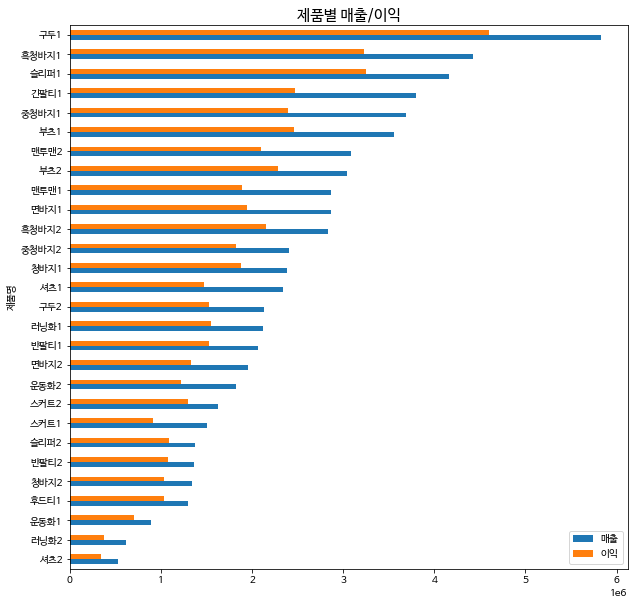

In [72]:
df4[['매출','이익']].sort_values(by='매출').plot.barh(rot=0, figsize=(10,10))
plt.title('제품별 매출/이익', size=15)
plt.show()

In [26]:
import seaborn as sns

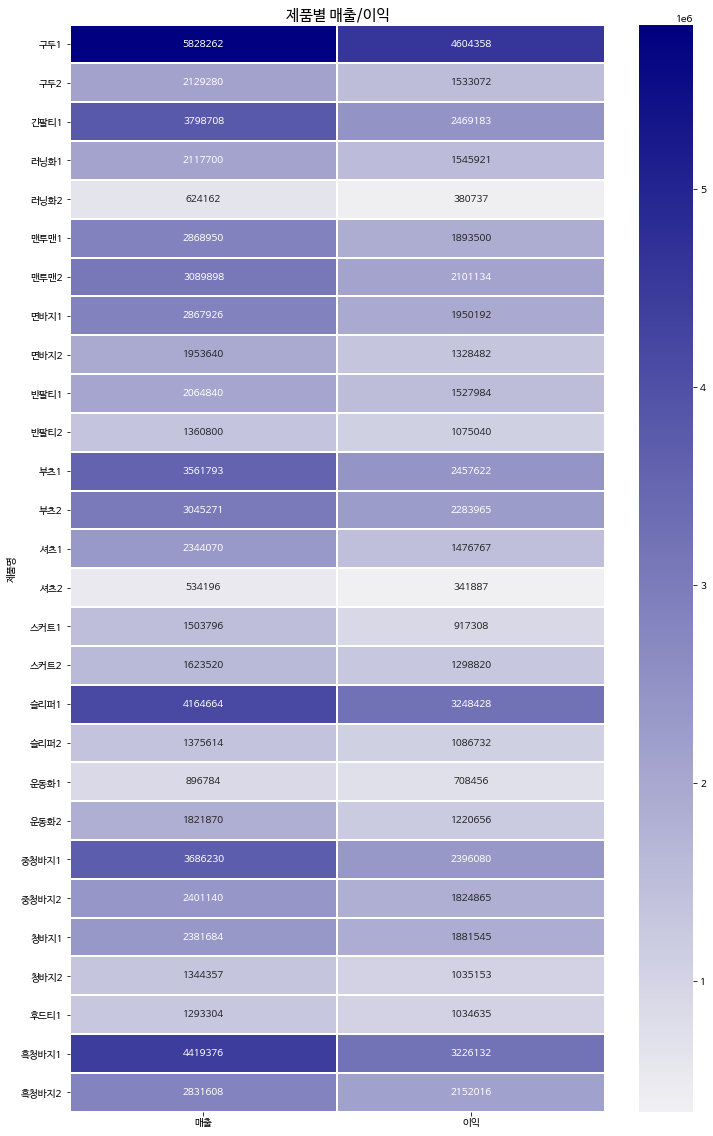

In [73]:
plt.figure(figsize=(12,20))
plt.title('제품별 매출/이익', size=15)
sns.heatmap(df4[['매출', '이익']], cmap=sns.light_palette('navy', as_cmap=True), annot=True, fmt="d", linewidths=1)
plt.show()

## 카테고리별 매출/이익 표 및 그래프

In [54]:
results = dm.get_category_rp(config)
df5 = pd.DataFrame(results, columns=['카테고리', '매출', '이익'])
df5.set_index('카테고리', inplace=True)
df5['매출'] = df5.매출.astype(int)
df5['이익'] = df5.이익.astype(int)
df5['이익율'] = np.round(df5.이익 / df5.매출 * 100, 2)
df5.sort_values('매출')
df5

,매출,이익,이익율
카테고리,,,
bottom,25013277,18010593,72.00
shoes,25565400,19069947,74.59
top,17354766,11920130,68.69


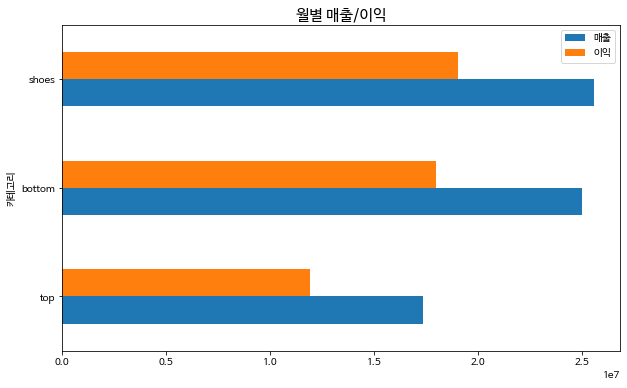

In [37]:

df5.sort_values('매출', inplace=False).plot.barh(figsize=(10,6))
plt.title('월별 매출/이익', size=15)
plt.show()

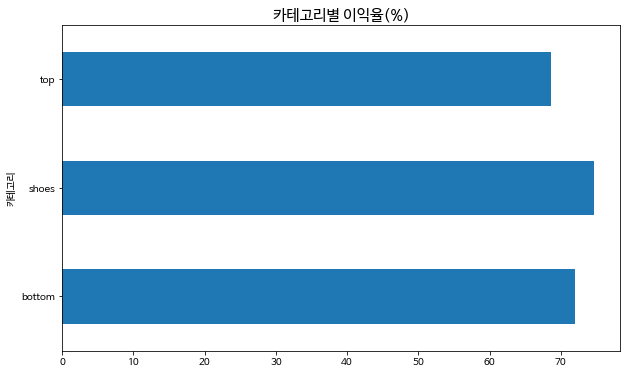

In [74]:
df5['이익율'].plot.barh(figsize=(10,6))
plt.title('카테고리별 이익율(%)', size=15)
plt.show()